In [8]:
import os
import sys
import random
import math
import re
import time
import skimage.io
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
matplotlib.use('TkAgg')
# Root directory of the project
RCNN_DIR = os.path.abspath("../Mask_RCNN")

# Import Mask RCNN
sys.path.append(RCNN_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(RCNN_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(RCNN_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Import COCO config
sys.path.append(os.path.join(RCNN_DIR, "samples/coco/"))  # To find local version
import coco

In [10]:
# MS COCO Dataset
import coco
config = coco.CocoConfig()
COCO_DIR = "C:/Users/Xin Yan/Documents/work/cocoapi"  # TODO: enter value here
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
# config.display()

In [12]:
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

MODE = "inference"

In [13]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode=MODE, model_dir=MODEL_DIR,
                              config=config)

# Set weights file path
if config.NAME == "shapes":
    weights_path = SHAPES_MODEL_PATH
elif config.NAME == "coco":
    weights_path = COCO_MODEL_PATH
# Or, uncomment to load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:\Users\Xin Yan\Documents\work\Mask_RCNN\mask_rcnn_coco.h5


In [15]:
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")
# Directory of images to run detection on
IMAGE_DIR = os.path.join(RCNN_DIR, "images")
file_names = next(os.walk(IMAGE_DIR))[2]
im_path = 'C:\\Users\\Xin Yan\\Documents\\work\\ds\\downloads\\one_motoring_wk1\\AYE - View from After Tuas West Road\\20190110\\20190110T115202.480.jpeg'
# image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image = skimage.io.imread(im_path)

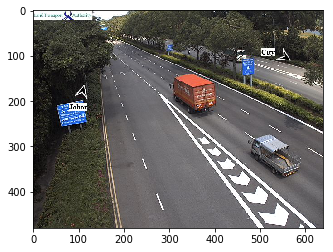

In [16]:
plt.figure()
plt.imshow(image)
plt.show()

In [18]:
# Get activations of a few sample layers
activations = model.run_graph([image], [
    ("input_image",        tf.identity(model.keras_model.get_layer("input_image").output)),
    ("res4w_out",          model.keras_model.get_layer("res4w_out").output),  # for resnet100
    ("rpn_bbox",           model.keras_model.get_layer("rpn_bbox").output),
    ("roi",                model.keras_model.get_layer("ROI").output),
])


input_image              shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10001  float32
res4w_out                shape: (1, 64, 64, 1024)     min:    0.00000  max:   58.53623  float32
rpn_bbox                 shape: (1, 261888, 4)        min:  -13.30494  max:   59.08856  float32
roi                      shape: (1, 1000, 4)          min:    0.08213  max:    1.00000  float32


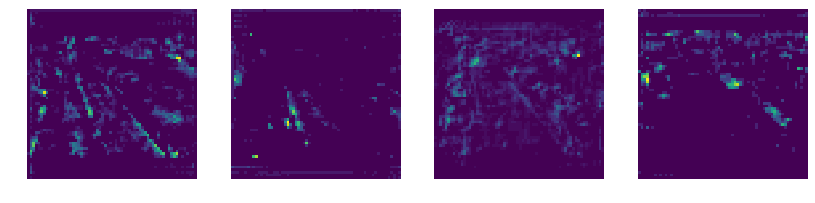

In [19]:
# Backbone feature map
display_images(np.transpose(activations["res4w_out"][0,:,:,:4], [2, 0, 1]))

In [14]:
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [20]:
activations.keys()

odict_keys(['input_image', 'res4w_out', 'rpn_bbox', 'roi'])

In [29]:
activations["rpn_bbox"].shape

(1, 261888, 4)